In [17]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Load diamonds CSV file

In [18]:
COLS = ["carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]
df = pd.read_csv("../../.spool/diamonds.csv", names=COLS, header=None)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.5
53937,0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
53938,0.7,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61,58,2757,6.15,6.12,3.74


Keep only numeric features + segregate data

In [19]:
X, y = df[["carat", "depth", "table", "x", "y", "z"]], df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(      carat depth table     x     y     z
 31510  0.34  61.2    59  4.49  4.43  2.73
 40698   0.4  62.2    56  4.71  4.78  2.95
 42634  0.58  59.7    57  5.47  5.41  3.25
 47714  0.54  60.5    59  5.24  5.28  3.18
 42049  0.41  61.1    56  4.83  4.86  2.96
 ...     ...   ...   ...   ...   ...   ...
 45891  0.57  61.3  55.1  5.34  5.42  3.29
 52416   0.7  62.6    60  5.58  5.66  3.52
 42613  0.36  62.7    59  4.54  4.58  2.86
 43567  0.51  61.5    56  5.15  5.16  3.17
 2732    0.9  62.8    61  6.12  6.02  3.81
 
 [43152 rows x 6 columns],
       carat depth table     x     y     z
 10176     1  64.1    60   6.3  6.22  4.01
 16083     1  61.7    58  6.37  6.43  3.95
 13420  1.23  62.7    58  6.82  6.79  4.27
 20407  1.51  62.9    58  7.21  7.33  4.57
 8909    0.8  61.4    57  5.98  5.94  3.66
 ...     ...   ...   ...   ...   ...   ...
 3638   0.74  61.2    56  5.82  5.85  3.57
 5508   1.01  61.7    58  6.46  6.41  3.97
 19535  1.22  62.6    56  6.83  6.87  4.29
 47950  0.31  60.5    57 

HPO w/ Random Forest regressor + default 5-KFold

In [20]:
regr = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={"max_depth": [10, 20, 30], "n_estimators": [20, 30]},
    verbose=10)
regr.fit(X_train, y_train)

print("Best estimator:", regr.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_depth=10, n_estimators=20...............................
[CV 1/5; 1/6] END max_depth=10, n_estimators=20;, score=0.888 total time=   1.6s
[CV 2/5; 1/6] START max_depth=10, n_estimators=20...............................
[CV 2/5; 1/6] END max_depth=10, n_estimators=20;, score=0.880 total time=   1.5s
[CV 3/5; 1/6] START max_depth=10, n_estimators=20...............................
[CV 3/5; 1/6] END max_depth=10, n_estimators=20;, score=0.884 total time=   1.2s
[CV 4/5; 1/6] START max_depth=10, n_estimators=20...............................
[CV 4/5; 1/6] END max_depth=10, n_estimators=20;, score=0.884 total time=   1.2s
[CV 5/5; 1/6] START max_depth=10, n_estimators=20...............................
[CV 5/5; 1/6] END max_depth=10, n_estimators=20;, score=0.886 total time=   1.2s
[CV 1/5; 2/6] START max_depth=10, n_estimators=30...............................
[CV 1/5; 2/6] END max_depth=10, n_estimators=30;,

Show MAPE plot

[{'max_depth': 10, 'n_estimators': 20}, {'max_depth': 10, 'n_estimators': 30}, {'max_depth': 20, 'n_estimators': 20}, {'max_depth': 20, 'n_estimators': 30}, {'max_depth': 30, 'n_estimators': 20}, {'max_depth': 30, 'n_estimators': 30}]


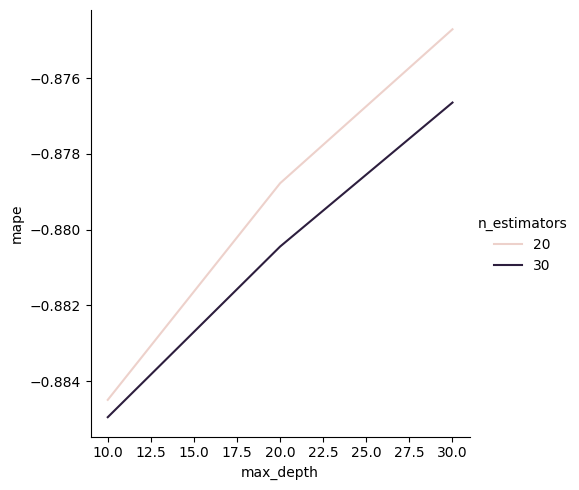

In [21]:
res = regr.cv_results_
print(res["params"])
est, md = [], []
for dict in res["params"]:
    est.append(dict["n_estimators"])
    md.append(dict["max_depth"])
mape_val = res["mean_test_score"] * -1

df2 = pd.DataFrame(data={"n_estimators": est, "max_depth": md, "mape": mape_val})
sns.relplot(data=df2, x="max_depth", y="mape", hue="n_estimators", kind="line")
plt.show()